# TP 1 - Équation de la chaleur (partie 2)
## Schéma explicite

On résout numériquement l'équation de la chaleur sur $\Omega:=]-L,L[$ avec conditions aux limites de Dirichlet

$$ \frac{\partial u}{\partial t}(x,t)-\frac{\partial^2 u}{\partial x^2}(x,t) = 0,\quad x \in \Omega,\quad t \gt 0,\\
u(-L,t)=u(L,t)=0,\quad t > 0,\\
u(x,0)=u_0(x),\quad x \in \Omega, $$

et le θ-schéma :

$$ \frac{u_j^{n+1}-u_j^n}{\Delta t}-\theta\frac{u_{j+1}^n-2u_j^n+u_{j-1}^n}{\Delta x^2}-(1-\theta)\frac{u_{j+1}^{n+1}-2u_j^{n+1}+u_{j-1}^{n+1}}{\Delta x^2} = 0. $$ 

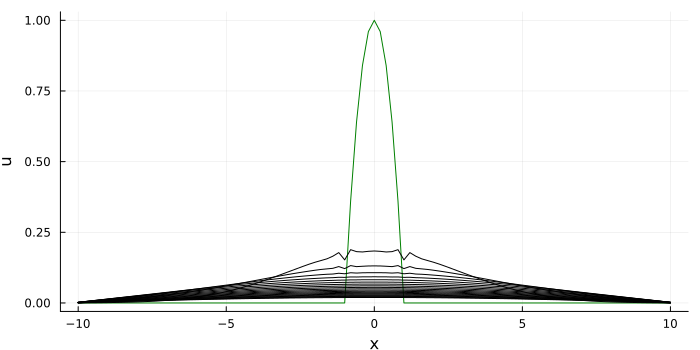

In [26]:
using LinearAlgebra, Plots

# Parameters
L = 10.0                               # domain half size
Nx = 100                               # grid size (space)
Δx = 0.025                           # step size (space)
σ = 0.1                                # CFL
Δt = 0.0000001                         # step size (time)
Nt = 200                               # grid size (time)
x = range(-L, L, length=Nx+1)          # grid (space)
u0 = max.(0, 1 .- x.^2)                # initial condition
θ = 0.5                                # theta condition

# Explicit scheme
u = u0
u_plot = plot(x, u, xlabel="x", ylabel="u", color=:green, legend=false)

A = Tridiagonal((θ .- 1)*ones(Nx), 2*(1 .- θ) .+ σ*ones(Nx+1), (θ .- 1)*ones(Nx))
B = Tridiagonal(θ*ones(Nx), σ .- 2* θ*ones(Nx+1), θ*ones(Nx))

for n = 1:Nt
    u = A\(B*u)
    if mod(n, Nt/20) == 0
        plot!(u_plot, x, u, xlabel="x", ylabel="u", color=:black, legend=false)
    end
end
display(plot(u_plot, size=(700, 350)))

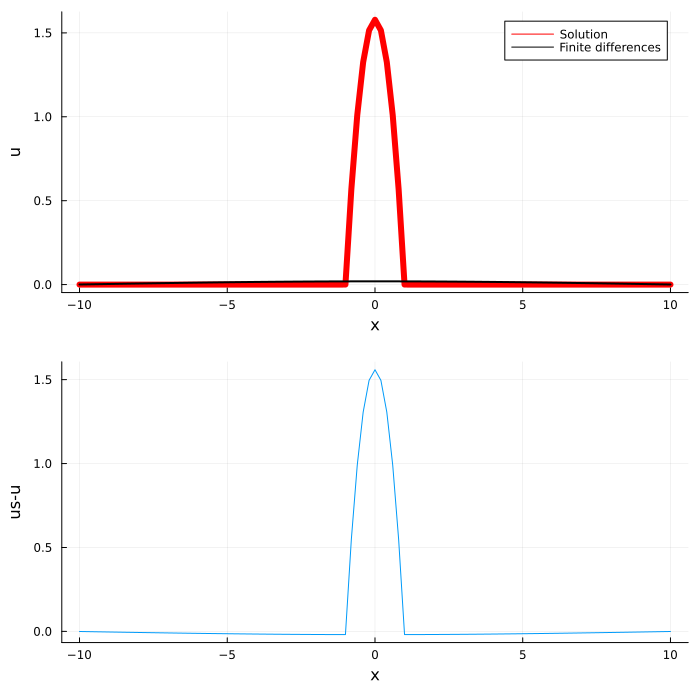

Δx: 0.025	 Δt:1.0e-7	 max error: 1.5588156830613895


In [22]:
# Comparison with exact solution (computed convoluting with Gaussian kernel)
us = zeros(Nx+1)
ker = exp.( -((0:Nx)*Δx).^2 / (4*Nt*Δt) )
kmax = findall(x -> x < 1e-14, ker)
kmax = length(kmax) > 0 ? kmax[1] : error("Increase Nx")

for j = 1:(Nx+1)
    jmin = max(1, j-kmax)
    jmax = min(Nx+1, j+kmax)
    us[j] = Δx * sum( u0[jmin:jmax].*ker[1 .+ abs.(j.-(jmin:jmax))] ) / sqrt(4*π*Nt*Δt)
end

err = us-u
us_plot = plot(x, us, xlabel="x", ylabel="us", color=:red, label="Solution", lw=6)
plot!(us_plot, x, u, xlabel="x", ylabel="u", color=:black, label="Finite differences", lw=2)
err_plot = plot(x, err, xlabel="x", ylabel="us-u", legend=false)
display(plot(us_plot, err_plot, layout=(2, 1), size=(700, 700)))
println("Δx: ", Δx, "\t Δt:", Δt, "\t max error: ", maximum(abs.(err)))

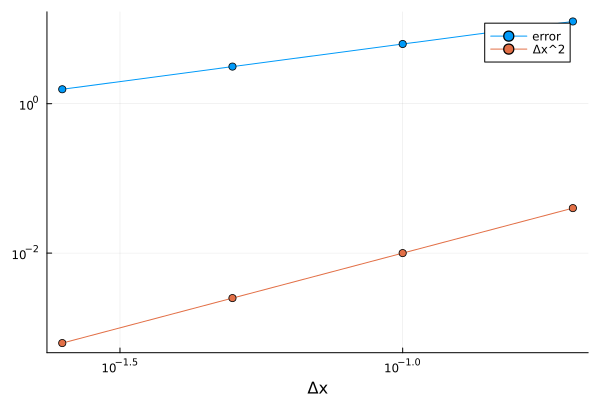

In [23]:
# Precision test 
# Quand θ=0.5
Δx = [ 0.2, 0.1, 0.05, 0.025]
errx = [ 12.596295, 6.288464, 3.134548, 1.558816 ]
plot(Δx, errx, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="error")
plot!(Δx, Δx.^2, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="Δx^2")

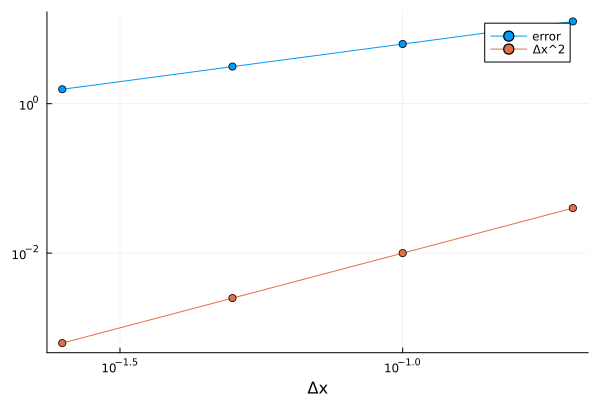

In [24]:
# Precision test
# Quand θ=0.1
Δx = [ 0.2, 0.1, 0.05, 0.025]
errx = [ 12.596156, 6.288325, 3.134409, 1.558676 ]
plot(Δx, errx, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="error")
plot!(Δx, Δx.^2, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="Δx^2")

## Question 1

On développe le θ-schéma pour mettre d'un côté les termes en n et de l'autre les termes en n+1 avec 𝛎 = 1.
Ainsi, les coefficients devant les termes en n correspondent à la matrice B et ceux devant les termes en n+1 correspondent à la matrice A.

Pour simplifier, on pose $$ \alpha = \frac{\Delta x^2}{\Delta t} $$

On a donc :

$$ A = \begin{pmatrix}
   2(1-\theta )+\alpha & \theta -1 &    &  & 0\\
   \theta -1 & 2(1-\theta )+\alpha & \theta -1 &     &  \\
     & ... & ... & ... & \\
     &  & \theta -1 & 2(1-\theta )+\alpha & \theta -1\\
   0 &    &  & \theta -1 & 2(1-\theta )+\alpha &
    \end{pmatrix}$$
    
et 

$$ B = \begin{pmatrix}
   \alpha - 2 \theta & \theta &  &    & 0\\
   \theta  & \alpha - 2 \theta & \theta  &    &  \\
     & ... & ... & ... & \\
   &    & \theta  & \alpha - 2 \theta & \theta \\
   0 &    &  & \theta  & \alpha - 2 \theta &
    \end{pmatrix}$$

## Question 2

On ajoute dans le code les matrices A et B :

```
A = Tridiagonal((θ .- 1)*ones(Nx), 2*(1 .- θ) .+ σ*ones(Nx+1), (θ .- 1)*ones(Nx))
B = Tridiagonal(θ*ones(Nx), σ .- 2*θ*ones(Nx+1), θ*ones(Nx))```

## Question 3

En analysant les schémas, on remarque que la précision est de 2 en espace, car on observe des courbes similaires à celles de Δx²


## Question 4

On test pour plusieurs valeurs de θ, pour voir les différences. 
Pour une valeur très faible de θ, on observe des courbes lisses, puisqu'on se rapproche du schéma implicite qui est inconditionnellement stable. Lorsque la valeur est proche de 0.5, les courbe sont moins stables, puisque la valeur limite est presque atteinte, donc on commence a observer des petites oscillations à certains endroits.

Quand θ>0.5, on n'est plus dans les conditions de stabilités, on observe donc des oscillations, le schéma "explose".

On fait ensuite 2 essais, avec θ=0.5 et θ=0.1 pour voir les différences.

Les différences ne sont pas très visibles, cela peut s'expliquer par le fait que la courbe étudiée n'est pas
dans un initervalle assez grand.

Dans notre cas, nous remarquons que sigma correspond à l'inverse de alpha. 
Il faudrait changer le code de la matrice tridiagonale, pour obtenir un résultat parfaitement juste. 